<a href="https://colab.research.google.com/github/uygararas/ie423/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Data-Driven Insights and Forecasting for Urban Transportation Ridership**
---

In [24]:
!pip install dataframe_image
!pip install tabula-py
!pip install pmdarima
!pip install jpype1

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
import dataframe_image as dfi
import tabula as tb
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [26]:
from google.colab import drive
drive.mount('/content/drive')
pdf_path="/content/drive/MyDrive/Colab Notebooks/data/hackathon/file.pdf"
df_1=tb.read_pdf(pdf_path,pages="all")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df_2021=df_1[0]
df_2020=df_1[1]
df_2019=df_1[2]
df_2018=df_1[3]
df_2021

,Yıl,Hatlarımız,Ocak,Şubat,Mart,Nisan,Mayıs,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasım,Aralık,Toplam
0,NaN,NaN,11.713.482,9.671.061,11.221.042,11.317.500,11.856.982,10.954.300,10.397.795,10.314.637,10.885.536,12.628.438,11.708.547,12.163.823,134.833.143
1,NaN,NaN,14.069.257,10.925.776,13.093.230,12.313.061,13.252.951,12.040.550,11.574.950,11.749.430,12.977.253,16.127.961,15.154.802,15.711.334,158.990.555
2,NaN,NaN,1.818.027,1.596.899,1.952.420,1.928.741,2.384.365,2.019.414,1.986.492,2.016.801,2.611.331,2.948.082,2.879.014,2.972.170,27.113.756
3,NaN,NaN,8.645.151,6.749.370,8.108.099,7.653.478,8.294.796,7.484.350,7.052.550,7.178.366,8.436.482,10.353.438,9.701.155,10.332.337,99.989.572
4,NaN,NaN,7.676.120,5.970.974,7.454.517,7.183.764,7.856.231,6.857.073,6.225.646,6.226.303,7.239.530,8.971.590,8.374.900,8.952.489,88.989.137
5,NaN,NaN,487.733,381.992,544.502,484.063,523.003,423.872,371.023,353.879,453.306,666.232,588.056,612.248,5.889.909
6,NaN,NaN,6.077.035,5.105.665,6.152.848,5.930.588,6.423.224,5.794.005,5.586.890,5.625.815,6.105.585,7.475.967,7.030.355,7.260.923,74.568.900
7,NaN,NaN,885.182,909.285,1.162.089,1.128.545,1.318.955,1.225.724,1.192.803,1.161.220,1.403.351,1.796.012,1.694.112,1.839.093,15.716.371
8,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,572.489,485.658,563.170,528.284,520.711,491.804,489.548,488.987,516.602,569.480,540.753,595.104,6.362.590


# **Decomposition of Total Ridership Time Series**
This decomposition analysis breaks down the total ridership time series into its trend, seasonal, and residual components. The trend component shows the overall direction of ridership over time, while the seasonal component highlights recurring patterns at fixed intervals. The residual component represents the random fluctuations in the data. By understanding these components, we can gain insights into the factors driving ridership patterns and make more informed predictions about future ridership.

In [28]:
dates_2021 = pd.date_range(start='2021-01-01', periods=17, freq='M') # Change periods to 16 to match df_2021
dates_2020 = pd.date_range(start='2020-01-01', periods=16, freq='M') # Change periods to 16 to match df_2020
dates_2019 = pd.date_range(start='2019-01-01', periods=15, freq='M') # Change periods to 14 to match df_2019
dates_2018 = pd.date_range(start='2018-01-01', periods=13, freq='M')

# Create DataFrames for each year with datetime index
df_2021.index = dates_2021
df_2020.index = dates_2020
df_2019.index = dates_2019
df_2018.index = dates_2018

# Combine the dataframes into a single dataframe
df_combined = pd.concat([df_2021, df_2020, df_2019, df_2018])

In [32]:
df_2021.head()

,Yıl,Hatlarımız,Ocak,Şubat,Mart,Nisan,Mayıs,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasım,Aralık,Toplam
2021-01-31,NaN,NaN,11.713.482,9.671.061,11.221.042,11.317.500,11.856.982,10.954.300,10.397.795,10.314.637,10.885.536,12.628.438,11.708.547,12.163.823,134.833.143
2021-02-28,NaN,NaN,14.069.257,10.925.776,13.093.230,12.313.061,13.252.951,12.040.550,11.574.950,11.749.430,12.977.253,16.127.961,15.154.802,15.711.334,158.990.555
2021-03-31,NaN,NaN,1.818.027,1.596.899,1.952.420,1.928.741,2.384.365,2.019.414,1.986.492,2.016.801,2.611.331,2.948.082,2.879.014,2.972.170,27.113.756
2021-04-30,NaN,NaN,8.645.151,6.749.370,8.108.099,7.653.478,8.294.796,7.484.350,7.052.550,7.178.366,8.436.482,10.353.438,9.701.155,10.332.337,99.989.572
2021-05-31,NaN,NaN,7.676.120,5.970.974,7.454.517,7.183.764,7.856.231,6.857.073,6.225.646,6.226.303,7.239.530,8.971.590,8.374.900,8.952.489,88.989.137


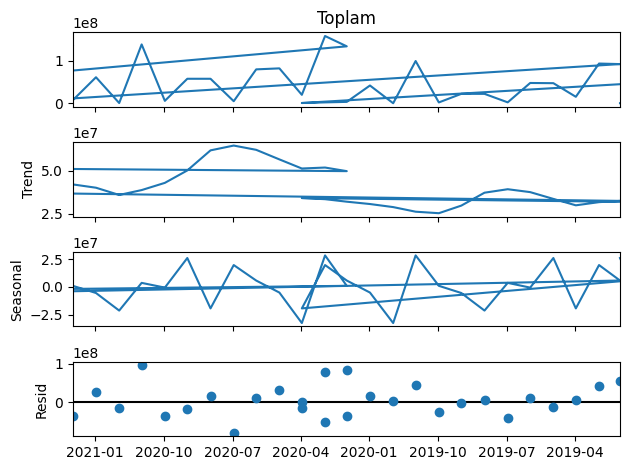

In [35]:
# Decompose the time series
#result = seasonal_decompose(df_combined['Total Rider'], model='additive', period=17)
result = seasonal_decompose(df_combined['Toplam'].str.replace('.', '').astype(float).fillna(method='ffill'), model='additive', period=12) # Use the correct column name 'Total Rider' and strip leading/trailing spaces. Also changed the period to 12 to represent the months in a year. Replace periods with empty strings and convert to float. Fill missing values using forward fill

# Plot the decomposition
result.plot()
plt.show()

# **Key Correlations in Public Transportation Data**
This matrix shows how strongly different variables in our data are related. Each number represents the correlation between two variables, ranging from -1 (strong negative relationship) to 1 (strong positive relationship). Zero means no relationship.

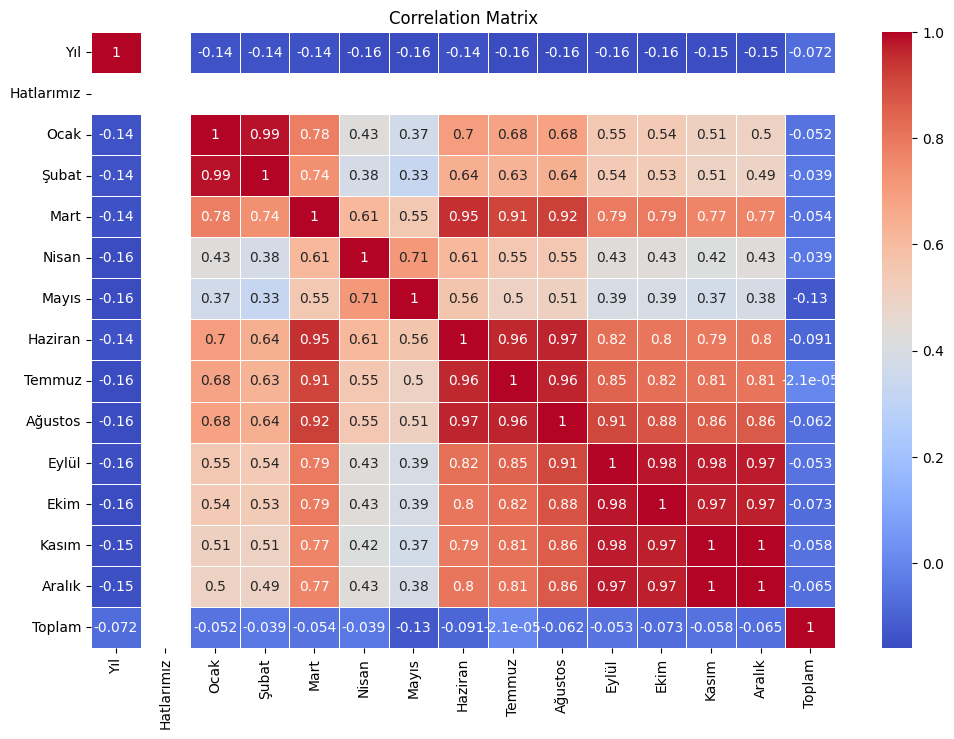

In [36]:
# Convert non-numeric columns to numeric if possible
for col in df_combined.columns:
    if df_combined[col].dtype == 'object':
        try:
            # Attempt to convert the entire column to numeric
            df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')
            # 'coerce' replaces non-convertible values with NaN
        except ValueError:
            print(f"Could not convert column {col} to numeric")

# Fill NaN values (if any) with an appropriate strategy
# For example, filling with 0:
df_combined = df_combined.fillna(0)

# Now calculate the correlation matrix
corr_matrix = df_combined.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#Seasonal Analysis

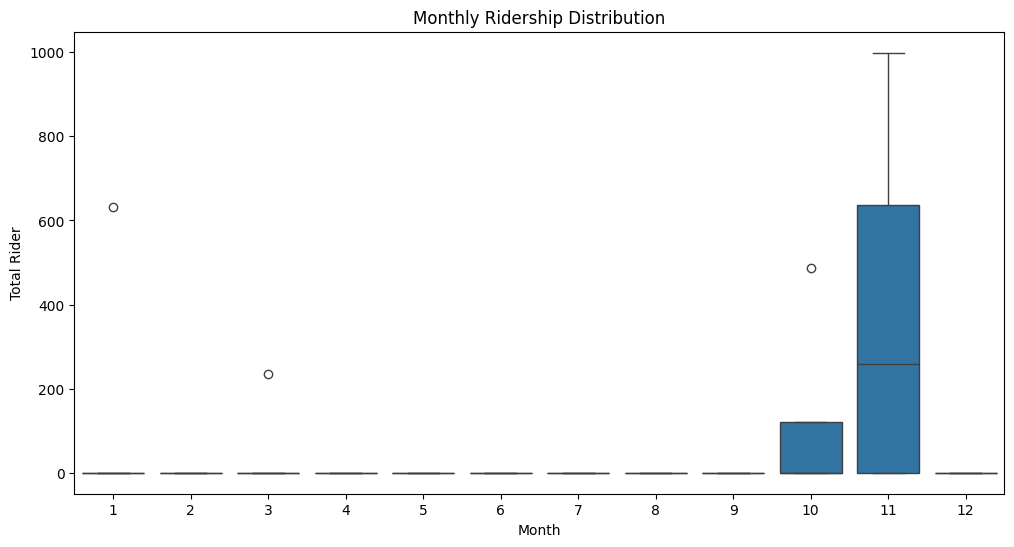

In [44]:
# Extract month and year from the datetime index
df_combined['Month'] = df_combined.index.month
df_combined['Year'] = df_combined.index.year

# Plot the monthly ridership for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Toplam', data=df_combined)
plt.title('Monthly Ridership Distribution')
plt.xlabel('Month')
plt.ylabel('Total Rider')
plt.show()

# Anomaly Detection

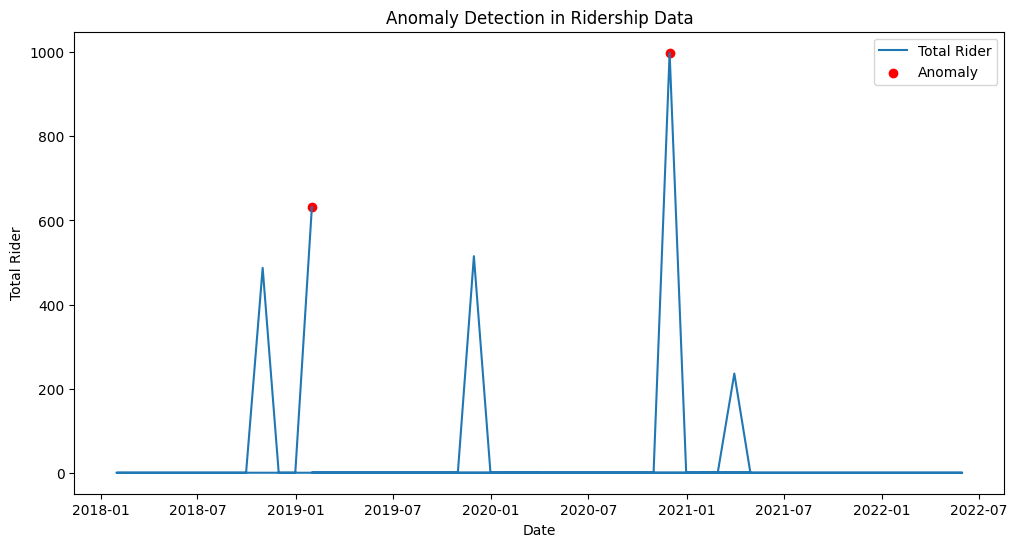

In [45]:
from scipy.stats import zscore

# Calculate Z-scores
df_combined['Z-Score'] = zscore(df_combined['Toplam'])

# Identify anomalies
anomalies = df_combined[df_combined['Z-Score'].abs() > 3]

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index, df_combined['Toplam'], label='Total Rider')
plt.scatter(anomalies.index, anomalies['Toplam'], color='red', label='Anomaly')
plt.title('Anomaly Detection in Ridership Data')
plt.xlabel('Date')
plt.ylabel('Total Rider')
plt.legend()
plt.show()

# Time Series Forecasting
Predict future ridership trends using the ARIMA model.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -309.673
Date:                Wed, 24 Jul 2024   AIC                            623.345
Time:                        06:54:30   BIC                            627.248
Sample:                    01-31-2018   HQIC                           624.841
                         - 05-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.2113    306.937      0.063      0.950    -582.374     620.796
sigma2      8713.3170    1.2e+04      0.729      0.466   -1.47e+04    3.22e+04
Ljung-Box (L1) (Q):                   0.10   Jarque-

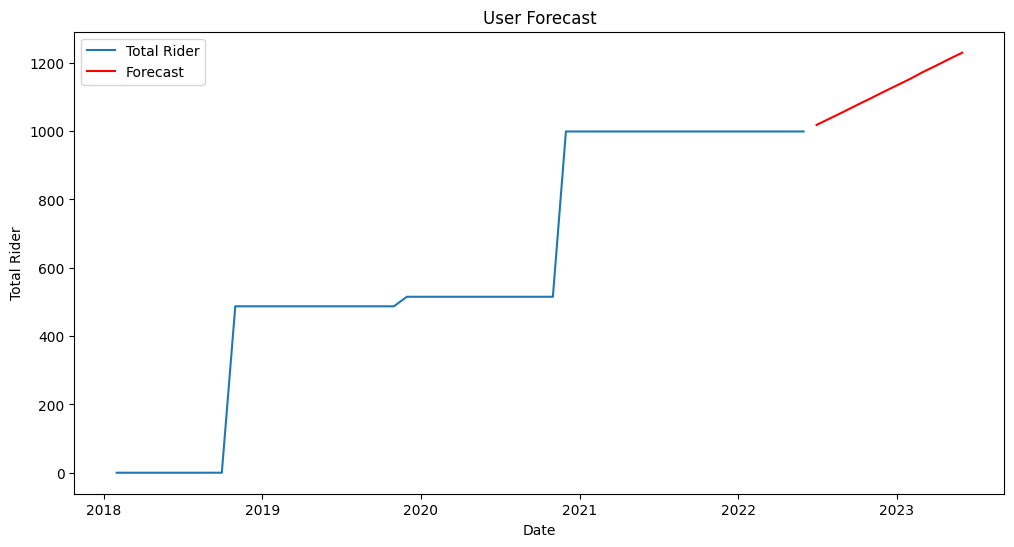

In [52]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pmdarima as pm

# Replace NaN values with 0
df_combined['Toplam'] = df_combined['Toplam'].fillna(0)

# Use pmdarima to find the best ARIMA parameters
model = pm.auto_arima(df_combined['Toplam'], seasonal=True, m=12)

# Print the best parameters found
print(model.summary())

# Forecast
forecast = model.predict(n_periods=12)

# Generate dates for the forecast
forecast_dates = pd.date_range(start=df_combined.index[-1], periods=13, freq='M')[1:]

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index, df_combined['Toplam'], label='Total Rider')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('User Forecast')
plt.xlabel('Date')
plt.ylabel('Total Rider')
plt.legend()
plt.show()

# Model Evaluation: Cross-Validation

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []

for train_index, test_index in tscv.split(df_combined):
    train, test = df_combined.iloc[train_index], df_combined.iloc[test_index]
    model = ARIMA(train['Toplam'], order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    mse = mean_squared_error(test['Toplam'], forecast)
    mse_scores.append(mse)

print(f'Mean MSE: {np.mean(mse_scores)}')

Mean MSE: 17697.20494498333


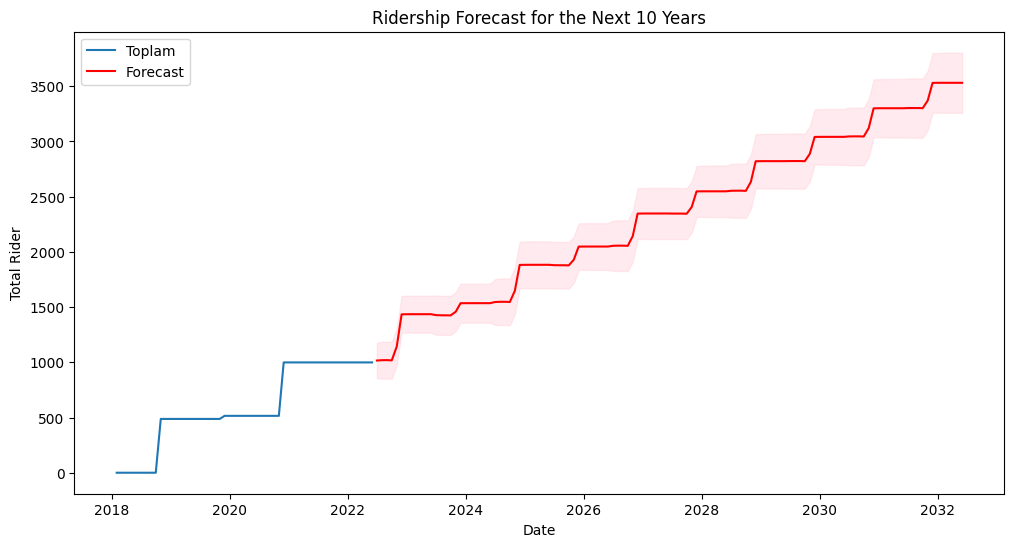

Current Ridership: 998.988
Predicted Ridership in 10 Years: 3531.2969177701666
Predicted Increase: 253.49%


In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure the date index is sorted and has a frequency
df_combined = df_combined.sort_index().asfreq('M')

# Fit SARIMA model
sarima_model = SARIMAX(df_combined['Toplam'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Forecast for the next 10 years (120 months)
forecast_steps = 120
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_combined.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_df = forecast.summary_frame(alpha=0.05)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index, df_combined['Toplam'], label='Toplam')
plt.plot(forecast_index, forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('Ridership Forecast for the Next 10 Years')
plt.xlabel('Date')
plt.ylabel('Total Rider')
plt.legend()
plt.show()

# Calculate required increase
current_ridership = df_combined['Toplam'].iloc[-1]
future_ridership = forecast_df['mean'].iloc[-1]
predicted_increase = (future_ridership - current_ridership) / current_ridership * 100

print(f"Current Ridership: {current_ridership}")
print(f"Predicted Ridership in 10 Years: {future_ridership}")
print(f"Predicted Increase: {predicted_increase:.2f}%")

In [67]:
# List of dataframes for easy manipulation
dfs = [df_2021, df_2020, df_2019, df_2018]

In [68]:
del df_2021["Yıl"]
del df_2021["Hatlarımız"]

df_2021.rename(columns={'Ocak': 'January', 'Şubat': 'February',"Mart":"March","Nisan":"April",
                       "Mayıs":"May","Haziran":"June","Temmuz":"July","Ağustos":"August","Eylül":"September",
                       "Ekim":"October","Kasım":"November","Aralık":"December","Toplam":"Total Rider"}, inplace=True)

df_2021.replace(np.nan,0,inplace=True)
df_2021.drop(index=df_2021.index[7],axis=0,inplace=True)
df_2021 = df_2021.replace(to_replace='[.,"]', value='', regex=True)

stations_2021=["M1","M2","M3","M4","M5","M6","M7","M9","T1","T3","T4","T5","F1","TF1","TF2",""]
df_2021["Stations"]=stations_2021

In [69]:
# Convert 'Total Rider' column to numeric, coercing errors to NaN
df_2021['Total Rider'] = pd.to_numeric(df_2021['Total Rider'], errors='coerce')

# Fill NaN values with 0, assuming missing values should be treated as no riders
df_2021['Total Rider'] = df_2021['Total Rider'].fillna(0)

grouped = df_2021.groupby(["Stations"]).sum().sort_values("Total Rider", ascending=False)
display(grouped)

,January,February,March,April,May,June,July,August,September,October,November,December,Total Rider
Stations,,,,,,,,,,,,,
M2,14069257,10925776,13093230,12313061,13252951,12040550,11574950,11749430,12977253,16127961,15154802,15711334,158990555
M1,11713482,9671061,11221042,11317500,11856982,10954300,10397795,10314637,10885536,12628438,11708547,12163823,134833143
T3,11015550,9396008,10901914,10496764,11938088,11114185,10943441,11078175,11187379,12356809,10708872,10903292,132040477
M4,8645151,6749370,8108099,7653478,8294796,7484350,7052550,7178366,8436482,10353438,9701155,10332337,99989572
M5,7676120,5970974,7454517,7183764,7856231,6857073,6225646,6226303,7239530,8971590,8374900,8952489,88989137
M7,6077035,5105665,6152848,5930588,6423224,5794005,5586890,5625815,6105585,7475967,7030355,7260923,74568900
T5,5453687,4586262,5557245,5358961,5736555,5133552,4806222,4788668,5348824,6218354,5735035,5991709,64715074
M3,1818027,1596899,1952420,1928741,2384365,2019414,1986492,2016801,2611331,2948082,2879014,2972170,27113756
F1,715167,542858,696644,798952,830296,786143,681004,489633,1610046,2031770,1748731,1839435,12770679


In [70]:
# Remove unnecessary columns
del df_2020["Yıl"]
del df_2020["Hatlarımız"]

# Rename columns to English
df_2020.rename(columns={
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March', 'Nisan': 'April',
    'Mayıs': 'May', 'Haziran': 'June', 'Temmuz': 'July', 'Ağustos': 'August',
    'Eylül': 'September', 'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December',
    'Toplam': 'Total Rider'
}, inplace=True)

# Convert all monthly columns to numeric
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for month in months:
    df_2020[month] = pd.to_numeric(df_2020[month], errors='coerce').fillna(0).astype(int)

In [71]:
# Convert 'Total Rider' column to numeric, coercing errors to NaN
df_2020['Total Rider'] = pd.to_numeric(df_2020['Total Rider'], errors='coerce').fillna(0).astype(int)

# Define stations (adjust this list as necessary)
stations_2020 = ["M1", "M2", "M3", "M4", "M5", "M6", "M7", "T1", "T3", "T4", "F1", "TF1", "TF2", "", "",""]

# Assign stations to the dataframe
df_2020["Stations"] = stations_2020

# Group by 'Stations' and sum 'Total Rider' for the year 2020
grouped2 = df_2020.groupby(["Stations"]).sum().sort_values("Total Rider", ascending=False)

# Display the grouped data
print(grouped2)

          January  February  March  April  May  June  July  August  September  \
Stations                                                                        
F1             60        66     78     82   89    87    73      79         90   
              365       394    521    517  715   660   695     724        717   
M1              0         0      0      0    0     0     0       0          0   
M2              0         0      0      0    0     0     0       0          0   
M3              0         0      0      0    0     0     0       0          0   
M4              0         0      0      0    0     0     0       0          0   
M5              0         0      0      0    0     0     0       0          0   
M6            314       327    460    450  446   409   300     328        425   
M7              0         0      0      0    0     0     0       0          0   
T1              0         0      0      0    0     0     0       0          0   
T3            429       421 

In [72]:
# For df_2019
del df_2019["Yıl"]
del df_2019["Hatlarımız"]
df_2019.rename(columns={'Ocak': 'January', 'Şubat': 'February',"Mart":"March","Nisan":"April",
                       "Mayıs":"May","Haziran":"June","Temmuz":"July","Ağustos":"August","Eylül":"September",
                       "Ekim":"October","Kasım":"November","Aralık":"December","Toplam":"Total Rider"}, inplace=True)
df_2019.replace(np.nan,0,inplace=True)
df_2019.drop(index=df_2019.index[7],axis=0,inplace=True) # Assuming same index needs to be dropped

In [73]:
df_2019 = df_2019.replace(to_replace='[.,"]', value='', regex=True)
stations_2019=["M1","M2","M3","M4","M5","M6","T1","T3","T4","F1","TF1","TF2","",""] # Assuming same stations
df_2019["Stations"]=stations_2019

In [74]:
# Convert 'Total Rider' column to numeric, coercing errors to NaN
df_2019['Total Rider'] = pd.to_numeric(df_2019['Total Rider'], errors='coerce')
# Fill NaN values with 0, assuming missing values should be treated as no riders
df_2019['Total Rider'] = df_2019['Total Rider'].fillna(0)
grouped3 = df_2019.groupby("Stations").sum().sort_values("Total Rider", ascending=False)

In [75]:
# For df_2018
del df_2018["Yıl"]
del df_2018["Hatlarımız"]
df_2018.rename(columns={'Ocak': 'January', 'Şubat': 'February',"Mart":"March","Nisan":"April",
                       "Mayıs":"May","Haziran":"June","Temmuz":"July","Ağustos":"August","Eylül":"September",
                       "Ekim":"October","Kasım":"November","Aralık":"December","Toplam":"Total Rider"}, inplace=True)
df_2018.replace(np.nan,0,inplace=True)
df_2018.drop(index=df_2018.index[7],axis=0,inplace=True) # Assuming same index needs to be dropped
df_2018 = df_2018.replace(to_replace='[.,"]', value='', regex=True)
stations_2018=["M1","M2","M3","M4","M5","M6","T1","T3","T4","F1","TF1","TF2"] # Assuming same stations
df_2018["Stations"]=stations_2018

In [76]:
# Convert 'Total Rider' column to numeric, coercing errors to NaN
df_2018['Total Rider'] = pd.to_numeric(df_2018['Total Rider'], errors='coerce')
# Fill NaN values with 0, assuming missing values should be treated as no riders
df_2018['Total Rider'] = df_2018['Total Rider'].fillna(0)
grouped4 = df_2018.groupby("Stations").sum().sort_values("Total Rider", ascending=False)

In [77]:
df_2021_months = df_2021[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
# Convert all columns in df_2021_months to numeric, coercing errors to NaN
df_2021_months = df_2021_months.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0, assuming missing values should be treated as 0
df_2021_months = df_2021_months.fillna(0)

# Now calculate the sum of each month
months_sum = df_2021_months.sum().sort_values()

df_2021_months

,January,February,March,April,May,June,July,August,September,October,November,December
2021-01-31,11713482,9671061,11221042,11317500,11856982,10954300,10397795,10314637,10885536,12628438,11708547,12163823
2021-02-28,14069257,10925776,13093230,12313061,13252951,12040550,11574950,11749430,12977253,16127961,15154802,15711334
2021-03-31,1818027,1596899,1952420,1928741,2384365,2019414,1986492,2016801,2611331,2948082,2879014,2972170
2021-04-30,8645151,6749370,8108099,7653478,8294796,7484350,7052550,7178366,8436482,10353438,9701155,10332337
2021-05-31,7676120,5970974,7454517,7183764,7856231,6857073,6225646,6226303,7239530,8971590,8374900,8952489
2021-06-30,487733,381992,544502,484063,523003,423872,371023,353879,453306,666232,588056,612248
2021-07-31,6077035,5105665,6152848,5930588,6423224,5794005,5586890,5625815,6105585,7475967,7030355,7260923
2021-09-30,0,0,0,0,0,0,0,0,0,0,0,0
2021-10-31,572489,485658,563170,528284,520711,491804,489548,488987,516602,569480,540753,595104
2021-11-30,11015550,9396008,10901914,10496764,11938088,11114185,10943441,11078175,11187379,12356809,10708872,10903292


In [78]:
df_2020_months = df_2020[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
# Convert all columns in df_2021_months to numeric, coercing errors to NaN
df_2020_months = df_2020_months.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0, assuming missing values should be treated as 0
df_2020_months = df_2020_months.fillna(0)

# Now calculate the sum of each month
months_sum2 = df_2020_months.sum().sort_values()

df_2020_months

,January,February,March,April,May,June,July,August,September,October,November,December
2020-01-31,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-29,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-31,0,0,0,0,0,0,0,0,0,0,0,0
2020-04-30,0,0,0,0,0,0,0,0,0,0,0,0
2020-05-31,0,0,0,0,0,0,0,0,0,0,0,0
2020-06-30,314,327,460,450,446,409,300,328,425,600,593,608
2020-07-31,0,0,0,0,0,0,0,0,0,0,0,0
2020-08-31,0,0,0,0,0,0,0,0,0,0,0,0
2020-09-30,429,421,509,474,543,501,477,495,513,594,572,602
2020-10-31,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
df_2019_months = df_2019[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
# Convert all columns in df_2021_months to numeric, coercing errors to NaN
df_2019_months = df_2019_months.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0, assuming missing values should be treated as 0
df_2019_months = df_2019_months.fillna(0)

# Now calculate the sum of each month
months_sum3 = df_2019_months.sum().sort_values()

df_2019_months

,January,February,March,April,May,June,July,August,September,October,November,December
2019-01-31,4878475,5278766,7409209,5529247,3927121,7509615,8456815,8530566,9426612,9561601,10911200,10975974
2019-02-28,4283353,4709625,6910277,4825054,3271264,7182204,7578449,8304300,9819379,10866680,12767272,13153933
2019-03-31,1327764,1442069,1827432,1279304,678106,1097854,1061883,1156997,1309948,1257136,1451721,1751001
2019-04-30,2148173,2421369,3611627,2528357,1740839,3754903,3843918,4178818,5034415,5437079,6280909,6620437
2019-05-31,2171272,2457110,3715022,2581446,1807516,3803206,3926289,4107134,5146567,5342762,6298792,6714625
2019-06-30,94862,102151,180735,106835,54966,165530,165568,206295,294375,365426,420825,448067
2019-07-31,1578726,1758439,2547936,1507433,919143,1576932,1514550,1629739,1976646,2035352,2411453,3085951
2019-09-30,0,0,0,0,11644,263303,289447,301068,336003,351515,416937,445166
2019-10-31,4898401,5376885,7827141,5987374,4247853,8452460,9567566,9747200,10441056,10483639,11476967,11113283
2019-11-30,3623,18324,37258,24878,13448,39306,52485,55204,62813,61986,70178,75599


In [80]:
df_2018_months = df_2018[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
# Convert all columns in df_2018_months to numeric, coercing errors to NaN
df_2018_months = df_2018_months.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0, assuming missing values should be treated as 0
df_2018_months = df_2018_months.fillna(0)

# Now calculate the sum of each month
months_sum4 = df_2018_months.sum().sort_values()

df_2018_months

,January,February,March,April,May,June,July,August,September,October,November,December
2018-01-31,12150118,12083527,7887978,1441190,1833621,5819072,7452001,7611430,7378377,7856622,6388907,5229400
2018-02-28,14374039,13918491,7975273,847118,1112014,4094515,5381247,5734316,6152757,6875580,5737649,4509206
2018-03-31,2097934,2056329,1495111,417754,453410,1203306,1427459,1413647,1503893,1595124,1541371,1401969
2018-04-30,7556741,7261688,4204623,492611,625126,2324910,3111000,3297862,3399425,3787061,2897812,2208759
2018-05-31,6249010,6103077,3762304,500965,652340,2378715,3193923,3374478,3446433,3852124,2955401,2234997
2018-06-30,507327,590195,308772,21766,24158,103552,135061,145649,160868,181850,136837,92859
2018-07-31,0,0,0,0,0,0,0,0,0,0,0,0
2018-09-30,11417759,11008299,6958495,1141567,1698580,5152649,6765495,7533423,7423296,8284385,6740472,5480540
2018-10-31,103115,106267,58753,436,0,0,29155,41155,42800,48479,35166,21171
2018-11-30,5117675,4991473,3362238,759692,924179,2558486,3163192,3244762,3266270,3551321,2955365,2423904


In [81]:
result1 = seasonal_decompose(grouped['Total Rider'], model='additive', period=6)  # Reduced period
result2 = seasonal_decompose(grouped2['Total Rider'], model='additive', period=6)
result3 = seasonal_decompose(grouped3['Total Rider'], model='additive', period=6)
result4 = seasonal_decompose(grouped4['Total Rider'], model='additive', period=6)

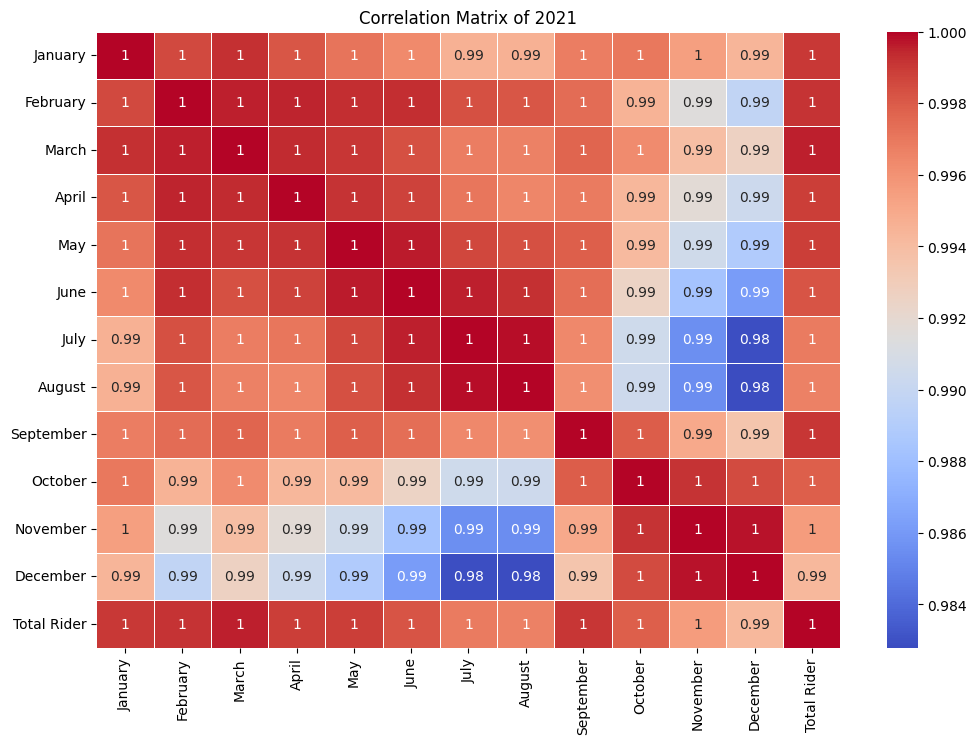

In [82]:
# @title
# Calculate the correlation matrix
corr_matrix1 = grouped.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of 2021')
plt.show()

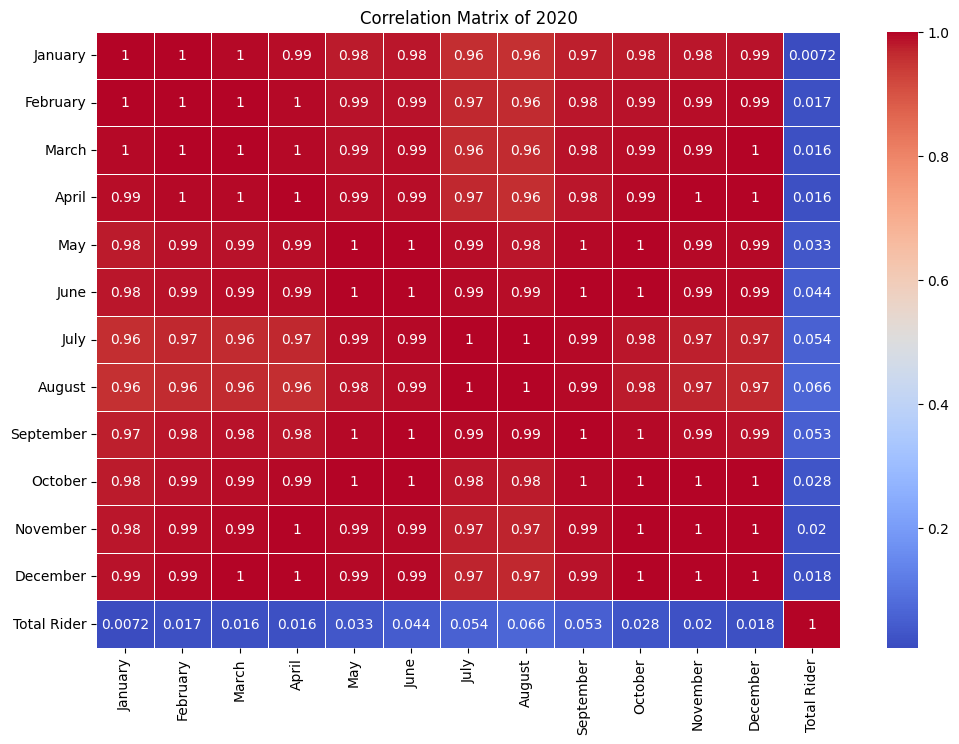

In [83]:
# @title
# Calculate the correlation matrix
corr_matrix2 = grouped2.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of 2020')
plt.show()

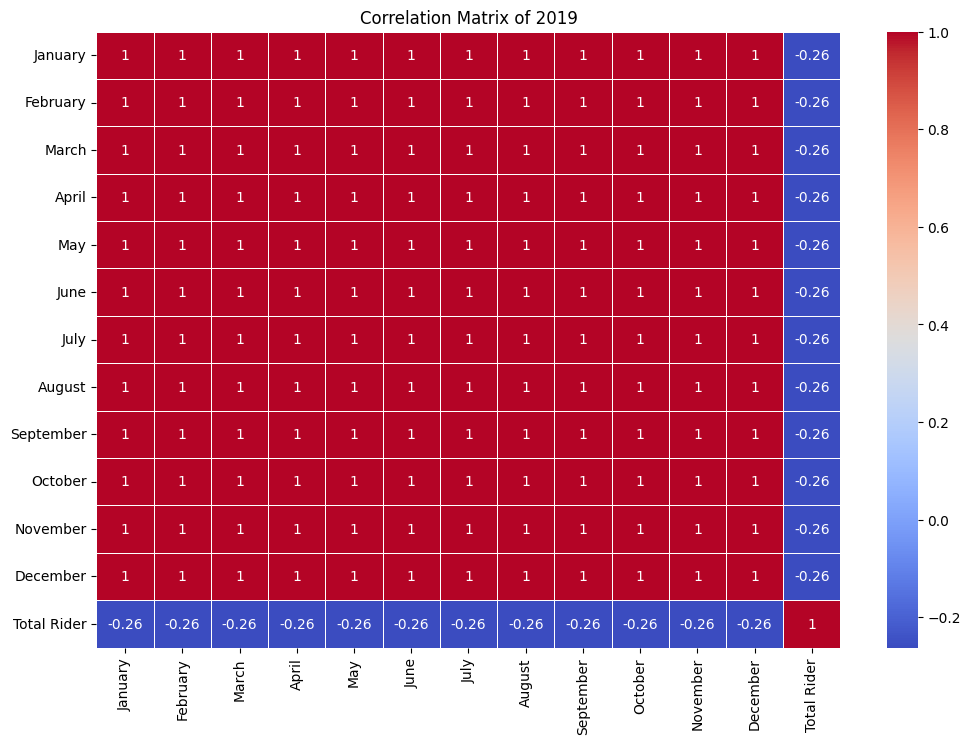

In [84]:
# @title
# Calculate the correlation matrix
corr_matrix3 = grouped3.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix3, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of 2019')
plt.show()

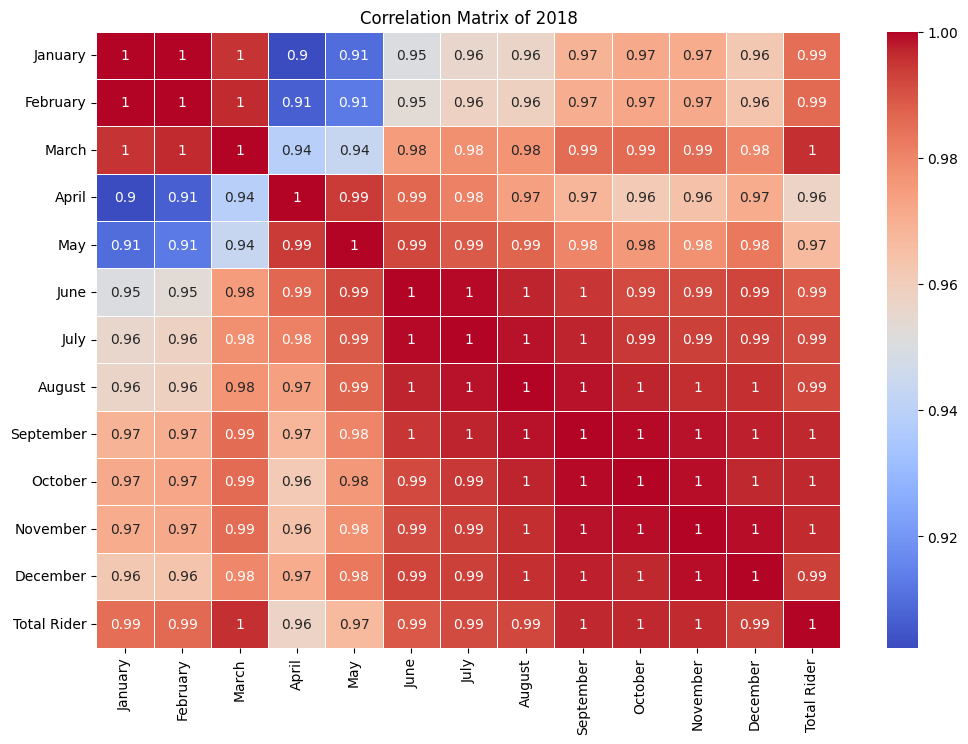

In [85]:
# @title
# Calculate the correlation matrix
corr_matrix4 = grouped4.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix4, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of 2018')
plt.show()

In [86]:
def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0

    return '%.0f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

<ipython-input-87-ee416f213d6b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font)
<ipython-input-87-ee416f213d6b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ax3.get_yticklabels(), fontproperties=font)
<ipython-input-87-ee416f213d6b>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_yticklabels(ax5.get_yticklabels(), fontproperties=font)
<ipython-input-87-ee416f213d6b>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_yticklabels(ax7.get_yticklabels(), fontproperties=font)


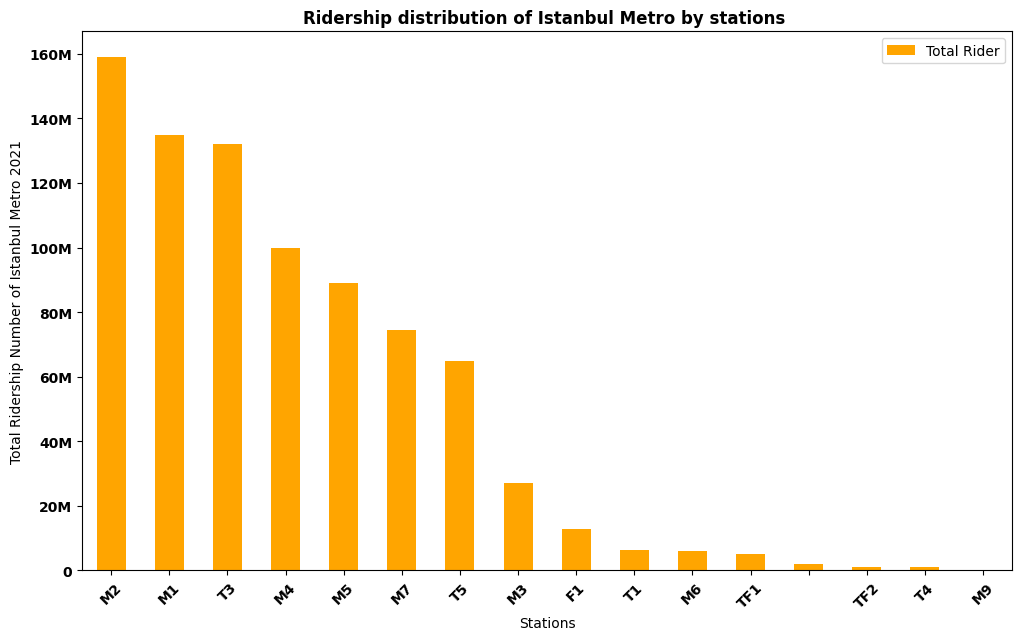

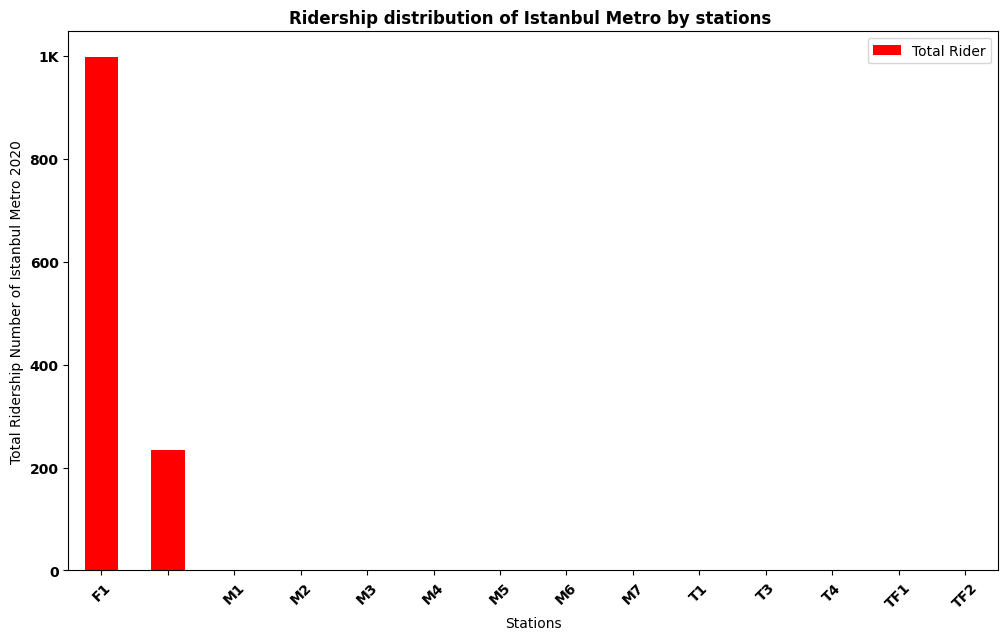

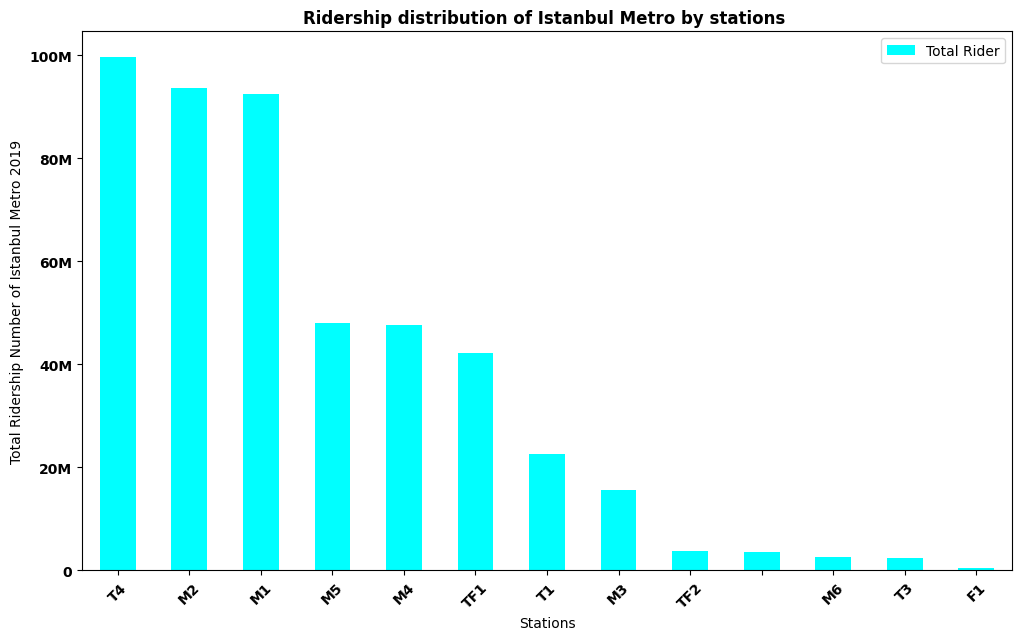

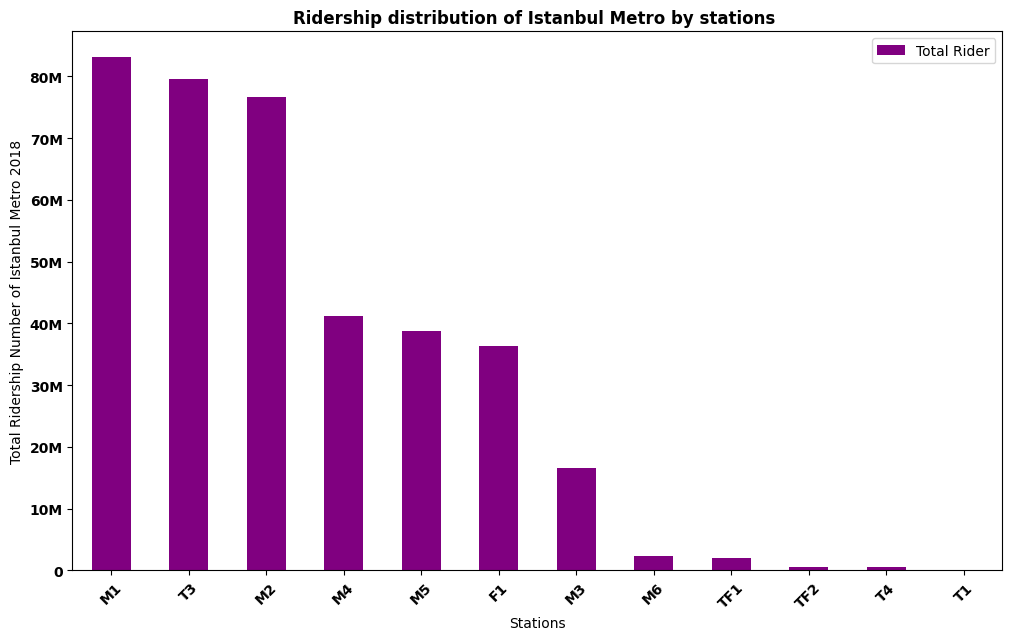

In [87]:
font = FontProperties()
font.set_weight('bold')

### Ridership 2021###
ax=grouped.plot(kind="bar", y="Total Rider",ylabel="Total Ridership Number of Istanbul Metro 2021",figsize=(12,7),color="Orange")
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font)
plt.xticks(rotation=45)
plt.title("Ridership distribution of Istanbul Metro by stations ",weight="bold");

### Ridership 2020###
ax3=grouped2.plot(kind="bar", y="Total Rider",ylabel="Total Ridership Number of Istanbul Metro 2020",figsize=(12,7),color="Red")
ax3.yaxis.set_major_formatter(FuncFormatter(human_format))
ax3.set_xticklabels(ax3.get_xticklabels(), fontproperties=font)
ax3.set_yticklabels(ax3.get_yticklabels(), fontproperties=font)
plt.xticks(rotation=45)
plt.title("Ridership distribution of Istanbul Metro by stations ",weight="bold");

### Ridership 2019###
ax5=grouped3.plot(kind="bar", y="Total Rider",ylabel="Total Ridership Number of Istanbul Metro 2019",figsize=(12,7),color="Cyan")
ax5.yaxis.set_major_formatter(FuncFormatter(human_format))
ax5.set_xticklabels(ax5.get_xticklabels(), fontproperties=font)
ax5.set_yticklabels(ax5.get_yticklabels(), fontproperties=font)
plt.xticks(rotation=45)
plt.title("Ridership distribution of Istanbul Metro by stations ",weight="bold");

### Ridership 2018###
ax7=grouped4.plot(kind="bar", y="Total Rider",ylabel="Total Ridership Number of Istanbul Metro 2018",figsize=(12,7),color="Purple")
ax7.yaxis.set_major_formatter(FuncFormatter(human_format))
ax7.set_xticklabels(ax7.get_xticklabels(), fontproperties=font)
ax7.set_yticklabels(ax7.get_yticklabels(), fontproperties=font)
plt.xticks(rotation=45)
plt.title("Ridership distribution of Istanbul Metro by stations ",weight="bold");

<ipython-input-88-04efb9eaff98>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels(), fontproperties=font)


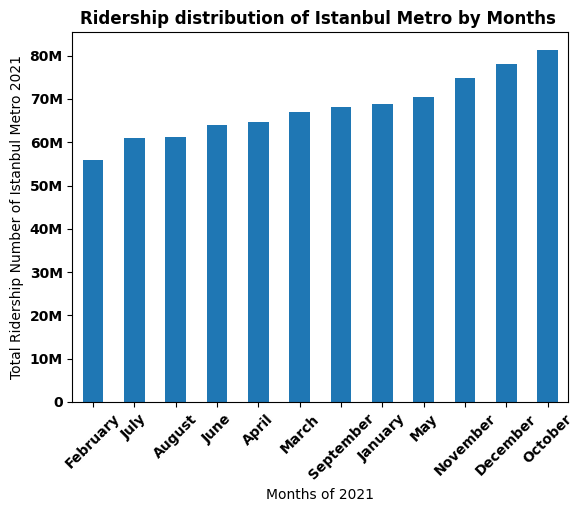

<ipython-input-88-04efb9eaff98>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(ax4.get_yticklabels(), fontproperties=font)


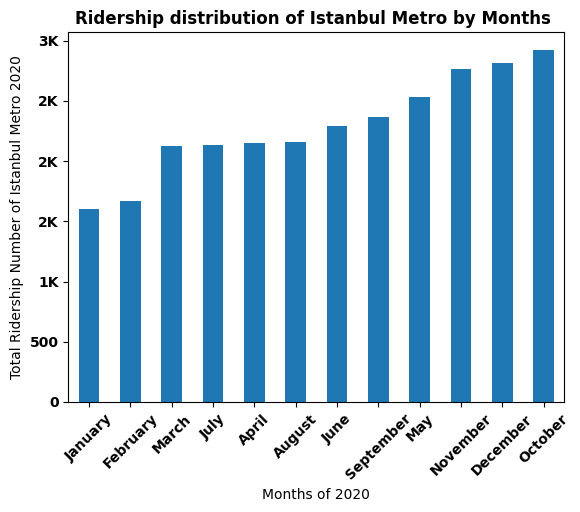

<ipython-input-88-04efb9eaff98>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_yticklabels(ax6.get_yticklabels(), fontproperties=font)


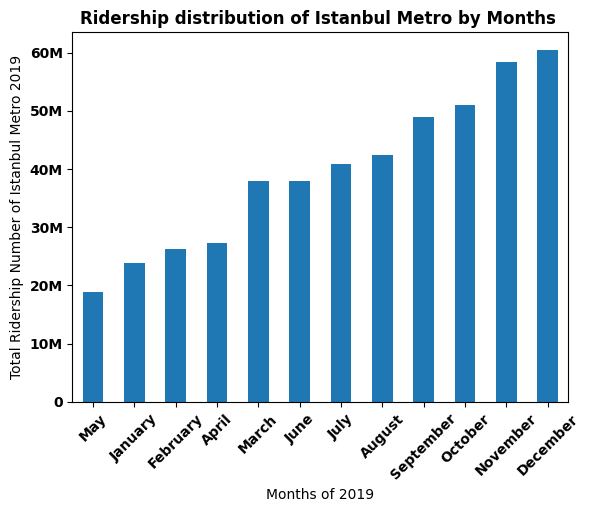

<ipython-input-88-04efb9eaff98>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax8.set_yticklabels(ax8.get_yticklabels(), fontproperties=font)


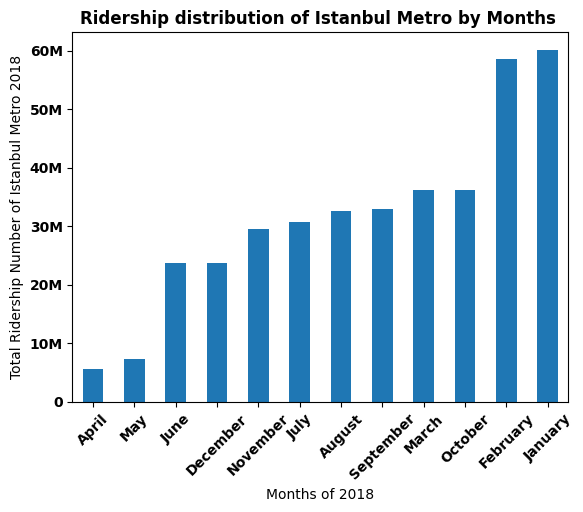

In [88]:
### Months 2021###
months_sum=df_2021_months.sum().sort_values()
months_sum.plot(kind='bar', xlabel='Months of 2021', ylabel='Total Ridership Number of Istanbul Metro 2021')

ax2=months_sum.plot(kind='bar', xlabel='Months of 2021', ylabel='Total Ridership Number of Istanbul Metro 2021')
ax2.yaxis.set_major_formatter(FuncFormatter(human_format))
ax2.set_xticklabels(ax2.get_xticklabels(), fontproperties=font)
ax2.set_yticklabels(ax2.get_yticklabels(), fontproperties=font)
plt.xticks(rotation=45)
plt.title("Ridership distribution of Istanbul Metro by Months ",weight="bold");
plt.show()

### Months 2020###
months_sum2=df_2020_months.sum().sort_values()
months_sum2.plot(kind='bar', xlabel='Months of 2020', ylabel='Total Ridership Number of Istanbul Metro 2020')

ax4=months_sum2.plot(kind='bar', xlabel='Months of 2020', ylabel='Total Ridership Number of Istanbul Metro 2020')
ax4.yaxis.set_major_formatter(FuncFormatter(human_format))
ax4.set_xticklabels(ax4.get_xticklabels(), fontproperties=font)
ax4.set_yticklabels(ax4.get_yticklabels(), fontproperties=font)
plt.xticks(rotation=45)
plt.title("Ridership distribution of Istanbul Metro by Months ",weight="bold");
plt.show()

### Months 2019###
months_sum3=df_2019_months.sum().sort_values()
months_sum3.plot(kind='bar', xlabel='Months of 2019', ylabel='Total Ridership Number of Istanbul Metro 2019')

ax6=months_sum3.plot(kind='bar', xlabel='Months of 2019', ylabel='Total Ridership Number of Istanbul Metro 2019')
ax6.yaxis.set_major_formatter(FuncFormatter(human_format))
ax6.set_xticklabels(ax6.get_xticklabels(), fontproperties=font)
ax6.set_yticklabels(ax6.get_yticklabels(), fontproperties=font)
plt.xticks(rotation=45)
plt.title("Ridership distribution of Istanbul Metro by Months ",weight="bold")
plt.show();

### Months 2018###
months_sum4=df_2018_months.sum().sort_values()
months_sum4.plot(kind='bar', xlabel='Months of 2018', ylabel='Total Ridership Number of Istanbul Metro 2018')

ax8=months_sum4.plot(kind='bar', xlabel='Months of 2018', ylabel='Total Ridership Number of Istanbul Metro 2018')
ax8.yaxis.set_major_formatter(FuncFormatter(human_format))
ax8.set_xticklabels(ax8.get_xticklabels(), fontproperties=font)
ax8.set_yticklabels(ax8.get_yticklabels(), fontproperties=font)
plt.xticks(rotation=45)
plt.title("Ridership distribution of Istanbul Metro by Months ",weight="bold")
plt.show();